In [33]:
# import libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [35]:
titanic_df = pd.read_csv('I:\\10 Projects\\titanic classification\\train.csv')

### View the data

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target column is Survived

### Explanation of features in data

In [37]:
# survival : Survival 0 = No, 1 = Yes
# pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
# sex : Sex
# Age : Age in years
# sibsp : Number of siblings / spouses aboard the Titanic
# parch # of parents / children aboard the Titanic
# ticket : Ticket number fare Passenger fare cabin Cabin number
# embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [38]:
titanic_df.columns # columns is an attribute

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
titanic_df.info() # since info is a method we need to put parenthasis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

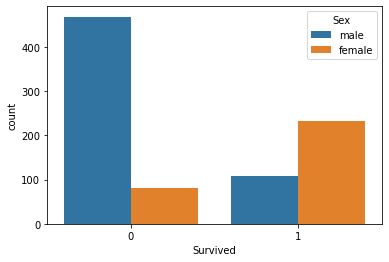

In [41]:
sns.countplot(x='Survived',data=titanic_df,hue = 'Sex')

In [42]:
# check null values 

In [43]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
# find the percent of null vakues in a specific columns

In [44]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
titanic_df['Embarked'].fillna('S',inplace=True)

In [62]:
titanic_df['Embarked'].isnull().sum()

0

In [48]:
(titanic_df['Age'].isnull().sum()/len(titanic_df['Age']))*100

19.865319865319865

In [49]:
(titanic_df['Cabin'].isna().sum()/len(titanic_df['Cabin']))*100

77.10437710437711

In [50]:
# find the distribution for the age column

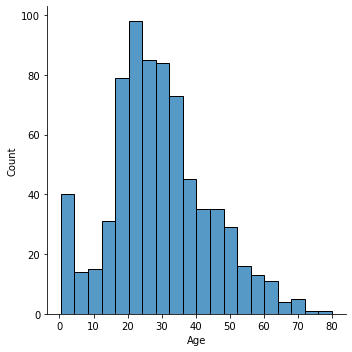

In [51]:
sns.displot(x='Age',data=titanic_df)

In [52]:
titanic_df['Age'].median()

28.0

In [53]:
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

In [54]:
titanic_df['Age'].isnull().sum()

0

In [55]:
# Drop column cabin as it has 70 percent null values

In [56]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [64]:
### We can see Name, Sex, Ticket and Embarked are non-numerical.
### It seems Name,Embarked and Ticket number are not useful for 
### Machine Learning Prediction hence we will eventually drop it. 
### For Now we would convert Sex Column to dummies numerical values

In [65]:
# convert Sex Column to dummies numerical values

In [66]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
titanic_df['Sex']= le.fit_transform(titanic_df['Sex']) 
titanic_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [70]:
# Drop the columns not required

In [74]:
titanic_df.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [75]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [76]:
# Separate dependent and independent variable

In [78]:
X = titanic_df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y = titanic_df.iloc[:,1]

In [80]:
print(X)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0              1       3    1  22.0      1      0   7.2500
1              2       1    0  38.0      1      0  71.2833
2              3       3    0  26.0      0      0   7.9250
3              4       1    0  35.0      1      0  53.1000
4              5       3    1  35.0      0      0   8.0500
..           ...     ...  ...   ...    ...    ...      ...
886          887       2    1  27.0      0      0  13.0000
887          888       1    0  19.0      0      0  30.0000
888          889       3    0  28.0      1      2  23.4500
889          890       1    1  26.0      0      0  30.0000
890          891       3    1  32.0      0      0   7.7500

[891 rows x 7 columns]


### Data Modeling

In [81]:
# Build a logistic Regression

In [82]:
# import train test spli

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [85]:
# import Logistic Regressio

In [86]:
from sklearn.linear_model import LogisticRegression

In [88]:
# fit Logistic Regression

In [89]:
lr= LogisticRegression()

In [90]:
lr.fit(X_train,y_train)

LogisticRegression()

In [91]:
# predict

In [92]:
y_predict = lr.predict(X_test)

In [93]:
y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

### Testing

In [94]:
# Confusion matrix

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test,y_predict)

array([[156,  19],
       [ 35,  85]], dtype=int64)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.82      0.71      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.81       295



In [106]:
# Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or by using other model

# Note:
# Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
# Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall.